In [74]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd
from os.path import join as pjoin
import scipy.io as sio
import skimage.filters as filters

In [83]:
# Get the filename for an example .mat file from the data directory.
data_dir = pjoin(getcwd(), 'data')
mat_fname = pjoin(data_dir, 'fractals_101.mat')

print('mat_fname = ', mat_fname, '\n')

# Load the .mat file contents.
mat_contents = sio.loadmat(mat_fname)
print('mat_contents.keys = ', sorted(mat_contents.keys()))

raw_image_set = mat_contents['X']

mat_fname =  /Users/ceciliawang/Desktop/UCLA/Senior Year/Spring 2019/CS 168/CS168-Automatic-TICI/data/fractals_101.mat 

mat_contents.keys =  ['TICI_Dr1', 'TICI_Dr2', 'TICI_report', 'X', '__globals__', '__header__', '__version__']


In [84]:
# Originally, image_set[:, :, k] is the kth image.
# Preprocess the image_set so that image_set[k, :, :] is the kth image.
image_set = np.transpose(raw_image_set, (2, 0, 1))
print('The shape of the image set is: {}'.format(np.shape(image_set)))

The shape of the image set is: (15, 1024, 1024)


In [88]:
def gray2binary(image_set):
    thresholds = list(map(filters.threshold_li, image_set))
    # When an image's frequency is too low, filters.threshold_li may 
    # cause a divide-by-zero RuntimeWarning, and the corresponding
    # threshold will be 0. So we need to remove zeros in thresholds.
    new_image_set = []
    for i in range(len(image_set)):
        if thresholds[i] > 0:
            new_image_set.append(image_set[i])
    
    thresholds = list(filter(lambda th: th > 0, thresholds))
    print(thresholds)
    
    result = []
    for i in range(len(thresholds)):
        result.append(new_image_set[i] > thresholds[i])
    return new_image_set, result

new_image_set, binary_image_set = gray2binary(image_set)

[0.009820904428089321, 0.009816878607916617, 0.009820358272920673, 0.009856002950971644, 0.00983246073070395, 0.007248096197301076, 0.007233972557605429, 0.007234490206531016, 0.007234682627130445, 0.007233360795768608, 0.007236113127635457, 0.00723568905591568, 0.007295714557164522, 0.007311211312484658, 0.007329745397738183]


In [89]:
def summarize_middle_artery(image_set):
    # Assume all the images in an image set have the same dimensions.
    image_count, image_height, image_width = np.shape(image_set)
    result = []
    for image in image_set:
        # Only consider the middle 1/4 of the upper 1/4 image.
        middle_section = image[0:int(image_height/4), int(image_width*3/8):int(image_width*5/8)]
        # plt.figure()
        # plt.imshow(middle_section, cmap='gray')
        
        summary = np.array(list(map(all, middle_section)))
        # print(np.count_nonzero(summary))

        summary = np.tile(summary[:, np.newaxis], 200)
        result.append(summary)
    return np.array(result)
    

middle_artery_summary_image_set = summarize_middle_artery(binary_image_set)
print(middle_artery_summary_image_set.shape)

(15, 256, 200)


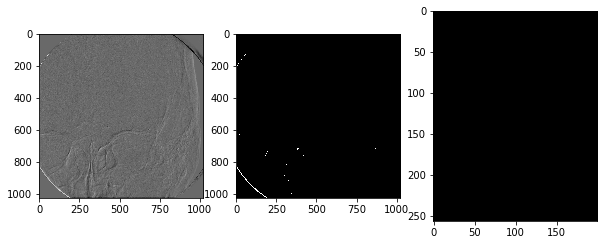

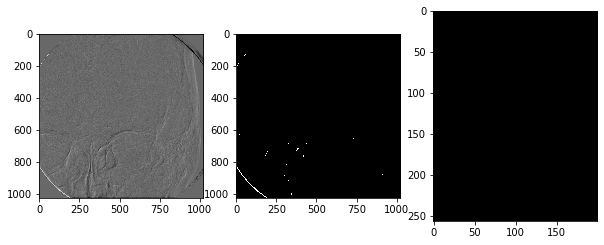

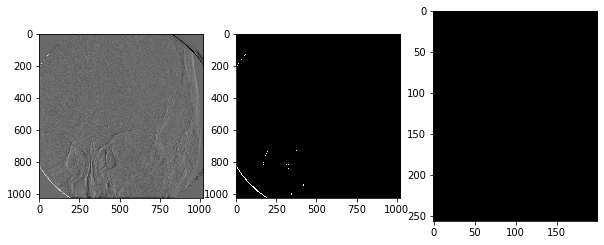

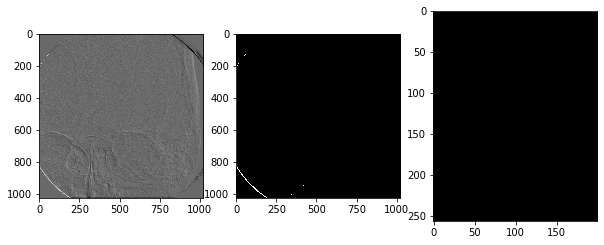

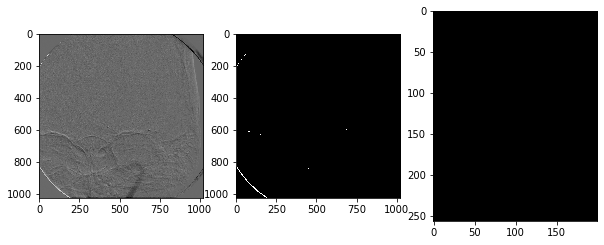

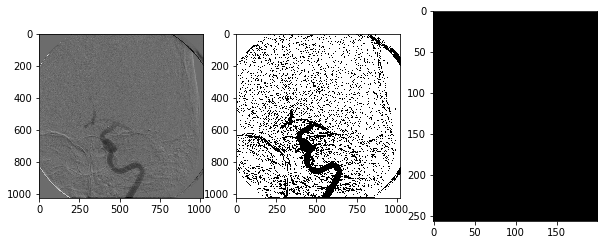

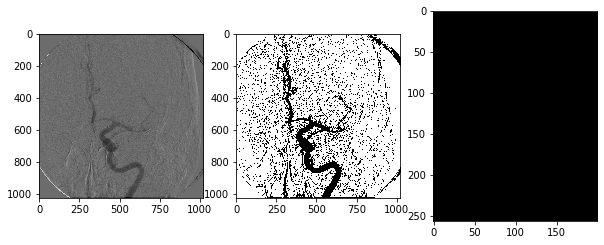

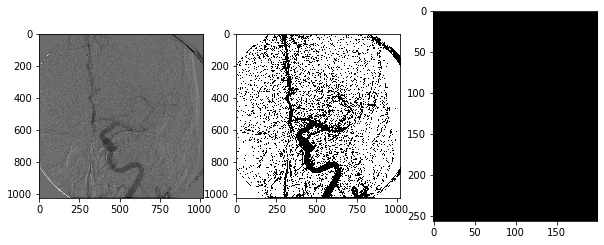

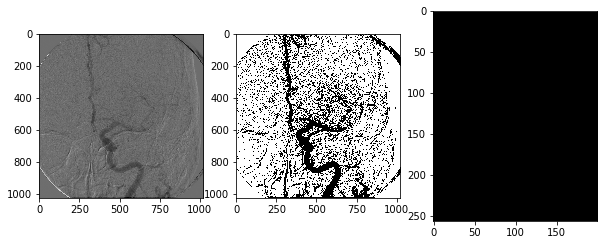

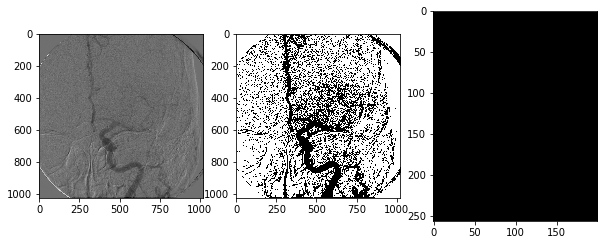

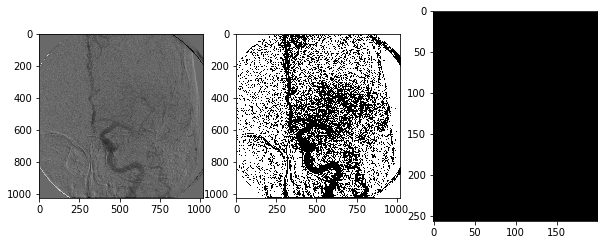

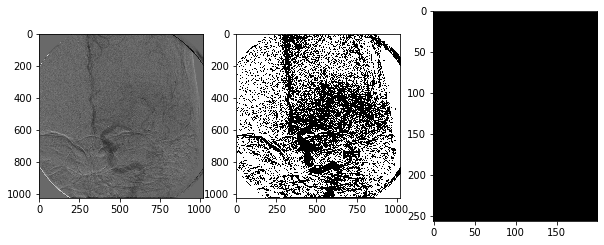

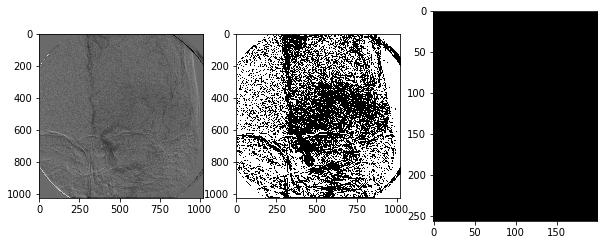

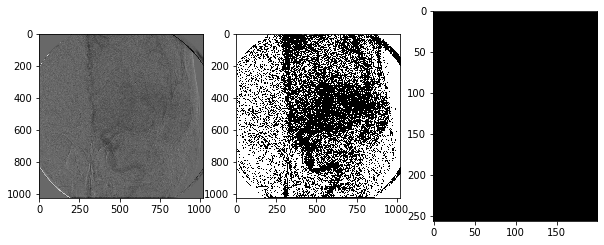

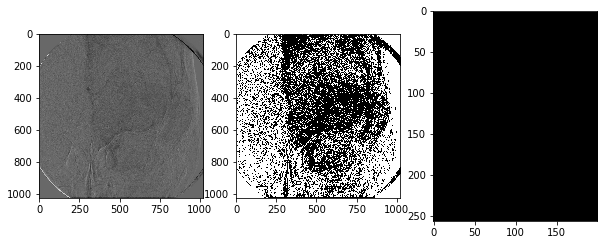

In [90]:
def show_images(all_image_sets):
    if len(all_image_sets) == 0:
        return
    # Assume all image sets have the same number of images.
    image_count = len(all_image_sets[0])
    n_image_sets = len(all_image_sets)
    for n in range(image_count):
        plt.figure(figsize=(10,5))
        for k in range(n_image_sets):
            plt.subplot(1, n_image_sets, k + 1)
            plt.imshow(all_image_sets[k][n], cmap='gray')
            
show_images([new_image_set, binary_image_set, middle_artery_summary_image_set])

[0.009820904428089321, 0.009816878607916617, 0.009820358272920673, 0.009856002950971644, 0.00983246073070395, 0.007248096197301076, 0.007233972557605429, 0.007234490206531016, 0.007234682627130445, 0.007233360795768608, 0.007236113127635457, 0.00723568905591568, 0.007295714557164522, 0.007311211312484658, 0.007329745397738183]
256 128.0
False 0 1
False 0 0
False 0 0
False 1 1
False 0 -1
False 2 2
False 2 0
False 2 0
False 2 0
False 2 0
False 2 0
False 2 0
False 2 0
False 2 0
False 2 0


TypeError: Image data of dtype object cannot be converted to float

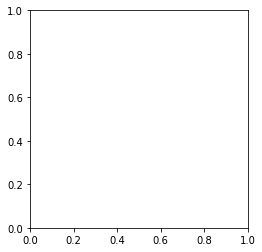

In [85]:
def choose_image(image_set):
    new_image_set, binary_image_set = gray2binary(image_set)
    middle_artery_summary_image_set = summarize_middle_artery(binary_image_set)
    image_count, image_height = np.shape(middle_artery_summary_image_set)
    
    flagOn = False
    previous_nonzeroCount = -1
    print(image_height, image_height/2)
    
    for i in range(image_count):
        nonzeroCount = np.count_nonzero(middle_artery_summary_image_set[i])
        
        print (flagOn, nonzeroCount, nonzeroCount - previous_nonzeroCount)
        
        if flagOn and nonzeroCount > 0 and nonzeroCount < image_height/2:
            return new_image_set[i]
        elif previous_nonzeroCount >= 0 and nonzeroCount > image_height/2:
            flagOn = True
        previous_nonzeroCount = nonzeroCount
    return None

result = choose_image(image_set)
plt.imshow(result, cmap='gray')